In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv('2019-Oct.csv', header='infer',
                      parse_dates = ['event_time'],
                      date_parser=pd.to_datetime,
                     nrows=2000000)

In [37]:
#dataset.info()

In [ ]:
#for weekday, frame in dataset.groupby([dataset.event_time.dt.weekday]): #gruped by weekday 1-mond 2-tues
#    print(f"First entry for {weekday!r}") #week of the day
#    print("--------------")
#    print(frame.head(10).user_session) #first entry of gorup 'weekday'

In [11]:
#for hour, frame in dataset.groupby([dataset.event_time.dt.hour]): #gruped by weekday 1-mond 2-tues
#    print(f"First entry for {hour!r}") #week of the day
#    print("--------------")
#    print(frame.head(1).brand) #first entry of gorup 'hour'

#### view group by hours

In [9]:
only_viewers = dataset[dataset.event_type == 'view']

In [15]:
only_viewers.groupby([dataset.event_time.dt.hour]).event_time.count()

event_time
0      11041
1      19194
2      54695
3      91131
4     107248
5     120084
6     126745
7     131621
8     135308
9     134053
10    125516
11    117807
12    115758
13    125776
14     98326
15     91425
16     97348
17     84483
18     62442
19     39819
20     20512
21     12807
22      7349
23      6198
Name: event_time, dtype: int64

#### view group by weekday

In [17]:
only_viewers.groupby([dataset.event_time.dt.weekday]).event_time.count()

event_time
1    1208280
2     728406
Name: event_time, dtype: int64

#### media visite by hour

In [20]:
only_viewers.groupby([dataset.event_time.dt.hour]).event_time.count().mean()

80695.25

# Create a plot that for each day of the week show the hourly average of visitors your store has.

In [36]:
for wkday, frame in only_viewers.groupby([dataset.event_time.dt.weekday]):
    print(f"Weekday: {wkday!r}")
    print(frame.groupby([dataset.event_time.dt.hour]).event_time.count().mean())

Weekday: 1
50345.0
Weekday: 2
48560.4


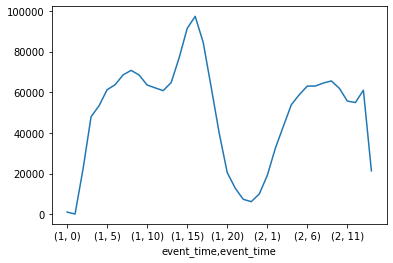

In [26]:
#plot of view grouped by weekday and hour
only_viewers.groupby([dataset.event_time.dt.weekday, dataset.event_time.dt.hour]).event_time.count().plot();

#### Number of times a product has been bought

In [39]:
only_purchases = dataset[dataset.event_type == 'purchase']

In [52]:
only_purchases.groupby([dataset.product_id]).product_id.count()

product_id
1001588      1
1002062      3
1002098      1
1002099     11
1002100      1
            ..
50600005     1
50600023     1
50600027     1
50600052     2
53600002     1
Name: product_id, Length: 7195, dtype: int64

#### Number of times a product has been viewed

In [50]:
only_viewers.groupby([dataset.product_id]).product_id.count()

product_id
1001588      112
1002042       58
1002062       37
1002098      238
1002099     1410
            ... 
53900014       2
53900016       2
53900017       2
54100000       8
54100001       9
Name: product_id, Length: 81476, dtype: int64

# Find the overall conversion rate of your store. 

In [57]:
num = only_purchases.groupby([dataset.product_id]).product_id.count().sum()

In [58]:
denom = only_viewers.groupby([dataset.product_id]).product_id.count().sum()

In [62]:
overall_conv_rate = num / denom

In [63]:
print(overall_conv_rate)

0.017492252228807355


# Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.

### Plot the number of purchases of each category 

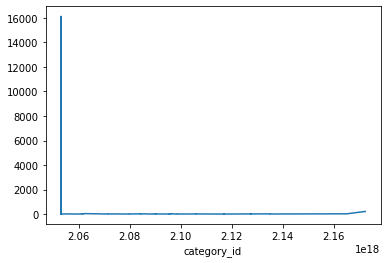

In [70]:
only_purchases.groupby([dataset.category_id]).category_id.count().plot();

### Show the conversion rate of each category in decreasing order 

In [74]:
for category, frame in dataset.groupby([dataset.category_id]):
    print(f"category_id: {category!r}")
    #num = frame[dataset.event_type == 'purchase'].event_type.count().sum()
    #denom = frame[dataset.event_type == 'view'].event_type.count().sum()
    #conv_rate = num / denom
    #print(conv_rate)
    

category_id: 2053013552226107603
category_id: 2053013552259662037
category_id: 2053013552293216471
category_id: 2053013552326770905
category_id: 2053013552351936731
category_id: 2053013552385491165
category_id: 2053013552427434207
category_id: 2053013552469377249
category_id: 2053013552502931683
category_id: 2053013552570040549
category_id: 2053013552603594983
category_id: 2053013552637149417
category_id: 2053013552662315243
category_id: 2053013552695869677
category_id: 2053013552737812719
category_id: 2053013552788144369
category_id: 2053013552821698803
category_id: 2053013552863641845
category_id: 2053013552888807671
category_id: 2053013552913973497
category_id: 2053013552955916539
category_id: 2053013552989470973
category_id: 2053013553031414015
category_id: 2053013553056579841
category_id: 2053013553090134275
category_id: 2053013553115300101
category_id: 2053013553140465927
category_id: 2053013553165631753
category_id: 2053013553199186187
category_id: 2053013553224352013
category_i

category_id: 2134905035589419799
category_id: 2134905039313961849
category_id: 2134905041696326587
category_id: 2134905044766557181
category_id: 2134905044833666047
category_id: 2134905045102100487
category_id: 2134905045177597961
category_id: 2134905045253095435
category_id: 2134905045328592909
category_id: 2134905045613805589
category_id: 2135658359968236364
category_id: 2135658542101693154
category_id: 2135658542386905834
category_id: 2135658542781170420
category_id: 2135658543242543872
category_id: 2135658545893344074
category_id: 2136389353511846005
category_id: 2136389354015162499
category_id: 2136935916512478049
category_id: 2137134549706998477
category_id: 2137704922018218396
category_id: 2138568472580325973
category_id: 2139150089359196199
category_id: 2141229835995840847
category_id: 2141355031935321056
category_id: 2141355067922449282
category_id: 2141478391264576072
category_id: 2141478391348462154
category_id: 2142171269733286244
category_id: 2144356630513320518
category_i